In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

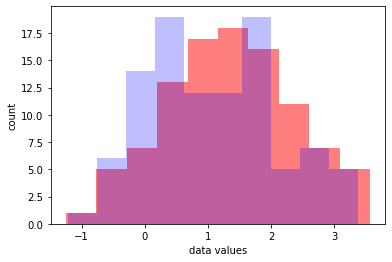

2.030322987079577
0.04500575023448435


In [21]:
# generating data for example
np.random.seed(0)
N = 100
# generating means for conditions
cond_mu = 1.3, 1
cond_std = 1, 1

d1 = (np.random.randn(N)* cond_std[0]) + cond_mu[0]
d2 = (np.random.randn(N)* cond_std[1]) + cond_mu[1]

# histograms to visualize the data 
plt.hist(d1, color = 'r', alpha = .5)
plt.hist(d2, color = 'b', alpha = .25)
plt.xlabel("data values")
plt.ylabel("count")
plt.show()

t_stats = stats.ttest_1samp(d1-d2, 0)

parametric_t = t_stats.statistic
parametric_p = t_stats.pvalue

print(parametric_t)
print(parametric_p)

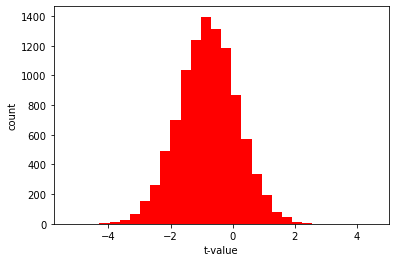

0.09660000000000002


In [24]:
# randomization 
np.random.seed(0)
num_rands = 10000

# this will store the emipirical distribution of t-values
null_t = np.zeros(num_rands)

for i in np.arange(num_rands):
    rand_data = np.sign(np.random.randn(N) - .5) * (d1 - d2)
    
    null_t[i] = stats.ttest_1samp(rand_data, 0)[0]
    
plt.hist(null_t, color = 'r', bins = 30)
plt.xlabel('t-value')
plt.ylabel('count')
plt.show()

# actually compute p-value 
rand_p = (1-(np.sum(parametric_t > np.abs(null_t))/num_rands))
print(rand_p)

0.81642051634484 0.0021696288730787875


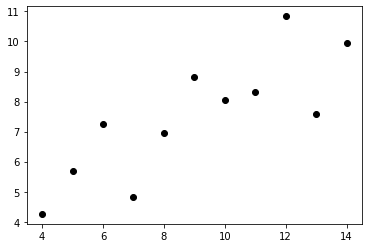

In [30]:
d1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
d2 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

N = len(d1)

para_r, para_p, = stats.pearsonr(d1, d2)

print(para_r, para_p)

plt.scatter(d1, d2, color = 'k')
plt.show()


In [3]:
np.random.seed(1)

num_rands = 5000

null_r = np.zeros(num_rands)

tmp0 = np.zeros(N)
tmp1 = np.zeros(N)

for i in np.arange(num_rands): 
    for j in np.arange(N): 
        if np.random.rand() < .5:
            tmp0[j] = d1[j]
            tmp1[j] = d2[j]
        else: 
            tmp0[j] = d2[j]
            tmp1[j] = d1[j]
            
    null_r[i], _= stats.pearsonr(tmp0, tmp1)

null_p = 2 * (np.sum(null_r>para_r)/num_rands)

print(null_p)

NameError: name 'N' is not defined

In [69]:
np.random.seed(0)

N = 1000000

pop_mean = 100
pop_std = 10

pop_data = np.random.randn(N) * pop_std - pop_mean

S_N = 1000000

index = np.random.permutation()[0:S_N]

samp_data = pop_data[index]

print(np.mean([pop_data]))
print(np.std([pop_data]))
print(np.mean([samp_data]))
print(np.std([samp_data]))

TypeError: permutation() takes exactly one argument (0 given)

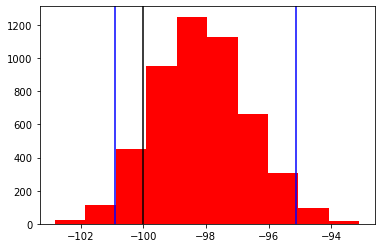

In [70]:
S_N = 20
index = np.random.permutation(N)[0:S_N]

samp_data = pop_data[index]

num_boots = 5000

boot_mean = np.zeros(num_boots)
for i in np.arange(num_boots): 
    boot_data = samp_data[np.random.randint(S_N, size = S_N)]
    
    boot_mean[i] = np.mean(boot_data)

CIs = np.percentile(boot_mean, [2.5, 97.5])

plt.hist(boot_mean, color = 'r')
plt.axvline(-pop_mean, color = 'k')
plt.axvline(CIs[0], color = 'b')
plt.axvline(CIs[1], color = 'b')
plt.show()


In [63]:
CIs

array([-100.49285641,  -99.63188939])

In [58]:
print(np.random.randint(S_N, size = S_N))

[ 1 11  4 18 17  8 11  0 15  1 11 10  6  3 14 16  4  5 11  4]


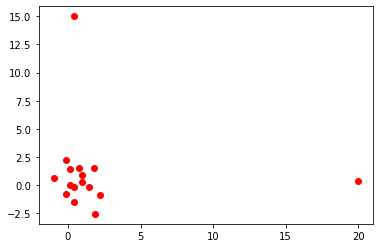

In [72]:
np.random.seed(0)

N=16

d1 = np.random.randn(N)
d2 = np.random.randn(N)

d1[-1] = 20
d2[-2] = 15

plt.scatter(d1, d2, color = 'r')
plt.show()

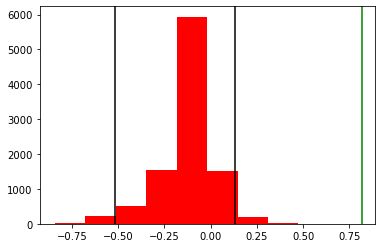

In [77]:
num_boots = 10000

corr = np.zeros(num_boots)
p = np.zeros(num_boots)

for i in np.arange(num_boots):
    index = np.random.randint(N, size = N)
    
    tmp1 = d1[index]
    tmp2 = d2[index]
    
    corr[i], _ = stats.pearsonr(tmp1, tmp2)

CIs = np.percentile(corr, [2.5, 97.5])

plt.hist(corr, color = 'r')
plt.axvline(para_r, color = 'g')
plt.axvline(CIs[0], color = 'k')
plt.axvline(CIs[1], color = 'k')
plt.show()
